In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os.path
import requests
import io

import acquire

pd.set_option("max_columns", 500)
pd.set_option('max_colwidth', 500)

## Acquiring the data

In [2]:
weather = acquire.acquire_weather()
sso = acquire.acquire_sso()
three_11 = acquire.acquire_311()

In [3]:
weather.head()

,STATION,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT16,WT16.1,WT17,WT18,WT19
0,USW00012921,2008-12-03,42,2302.0,2315.0,0,0,0,NaN,250,89,360,350.0,89,170.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,USW00012921,2008-12-04,51,828.0,506.0,0,0,0,NaN,161,39,20,350.0,94,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012921,2008-12-05,30,952.0,839.0,0,0,0,NaN,128,22,20,30.0,67,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00012921,2008-12-06,17,1157.0,1132.0,0,0,0,NaN,206,-11,240,270.0,45,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00012921,2008-12-07,31,1557.0,1512.0,0,0,0,NaN,217,22,160,190.0,76,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sso.head()

,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3
0,6582,567722.0,NaN,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,Grease,"Spill ContainedReturned to SystemArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,172A2,3,2019,11,0.0,NaN,8.0,16.55,PVC,1997.0,NaN,NaN,NaN,NaN,3200 THOUSAND OAKS DR,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,0.450000,2019-03-10 13:43:00,False,24.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
1,6583,567723.0,NaN,2019-03-10 00:00:00,6804,S FLORES ST,80,0.0,80.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,251A3,3,2019,11,0.0,NaN,8.0,157.00,PVC,1988.0,NaN,NaN,NaN,NaN,6804 S FLORES,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,1.083333,2019-03-10 15:30:00,False,120.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
2,6581,567714.0,NaN,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,10.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,Structural,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,190E4,3,2019,10,0.0,NaN,8.0,350.00,CP,1955.0,NaN,NaN,NaN,NaN,215 Audrey Alene Dr,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,1.000000,2019-03-09 19:00:00,False,24.0,NaN,NaN,03/10/2019 09:36,03/10/2019 10:45,1.15,69.0,NaN,NaN,0.0,0.0
3,6584,567713.0,NaN,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,83.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,Grease,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,252C3,3,2019,10,0.0,NaN,8.0,213.91,PVC,1983.0,NaN,NaN,NaN,NaN,3602 SE MILITARY DR,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,0.550000,2019-03-09 16:10:00,False,120.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
4,6580,567432.0,NaN,2019-03-06 00:00:00,100,PANSY LN,75,0.0,75.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,Structural,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,192A7,3,2019,10,0.0,NaN,12.0,291.90,CP,1952.0,NaN,NaN,NaN,NaN,100 PANSY LN,NaN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.000000,2019-03-06 09:40:00,False,3.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0


In [5]:
three_11.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Streets & Infrastructure,1010126853,12/10/2011,12/11/2011,3/5/2020,YES,Trans & Cap Improvements,Storm Water,Tree Fallen,Closed,Constituent Call,ELM CREEK and WURZBACH RD,8,2113584.0,13747492.0,6/20/2019,6/20/2020
1,Streets & Infrastructure,1010126880,12/10/2011,12/13/2011,3/5/2020,YES,Trans & Cap Improvements,Streets,Barricade - Misc. Special Event/Emergency,Closed,Constituent Call,"1600 CENTENNIAL BV, San Antonio, 78211",5,2116553.0,13684805.0,6/20/2019,6/20/2020
2,Information,1010338011,5/25/2012,NaN,1/27/2020,NO,Knowledge Management,Knowledge,Knowledge Solution Extra,Closed,Constituent Call,"310 ROOSEVELT AV, San Antonio, 78210",5,2132295.0,13693603.0,6/20/2019,6/20/2020
3,Graffiti,1010444245,8/15/2012,8/30/2012,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,6/20/2019,6/20/2020
4,Property Maintenance,1010888252,6/6/2013,8/9/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,6/20/2019,6/20/2020


## Weather explore
- dealing with nulls

In [6]:
weather.isna().sum() / len(weather) * 100

STATION      0.000000
DATE         0.000000
AWND         0.000000
FMTM        71.833598
PGTM        72.840488
PRCP         0.000000
SNOW         0.000000
SNWD         0.000000
TAVG        41.865395
TMAX         0.000000
TMIN         0.000000
WDF2         0.000000
WDF5         0.291468
WSF2         0.000000
WSF5         0.291468
WT01        70.429253
WT02        95.654478
WT03        91.255962
WT05        94.912560
WT06        99.841017
WT07        99.072602
WT08        88.049815
WT09        99.178590
WT10       100.000000
WT11        99.735029
WT13        88.818230
WT16        88.606253
WT16.1      88.606253
WT17        99.947006
WT18        99.947006
WT19       100.000000
dtype: float64

In [7]:
# 100% null values
weather = weather.drop(columns=['WT19', "WT10"])

In [8]:
# filling NaN's with 0 because boolean value
weather = weather.fillna(0)

In [9]:
# no more missing data!
weather.isna().sum()

STATION    0
DATE       0
AWND       0
FMTM       0
PGTM       0
PRCP       0
SNOW       0
SNWD       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
WT01       0
WT02       0
WT03       0
WT05       0
WT06       0
WT07       0
WT08       0
WT09       0
WT11       0
WT13       0
WT16       0
WT16.1     0
WT17       0
WT18       0
dtype: int64

In [10]:
# Are WT16 & WT16.1 the same?
mask = weather.WT16 == weather['WT16.1']

mask.sum()

3774

In [11]:
len(weather)

3774

In [12]:
# our mask and the length of our dataframe are the same so we dropped WT16.1
weather = weather.drop(columns=(['WT16.1']))

In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 28 columns):
STATION    3774 non-null object
DATE       3774 non-null object
AWND       3774 non-null int64
FMTM       3774 non-null float64
PGTM       3774 non-null float64
PRCP       3774 non-null int64
SNOW       3774 non-null int64
SNWD       3774 non-null int64
TAVG       3774 non-null float64
TMAX       3774 non-null int64
TMIN       3774 non-null int64
WDF2       3774 non-null int64
WDF5       3774 non-null float64
WSF2       3774 non-null int64
WSF5       3774 non-null float64
WT01       3774 non-null float64
WT02       3774 non-null float64
WT03       3774 non-null float64
WT05       3774 non-null float64
WT06       3774 non-null float64
WT07       3774 non-null float64
WT08       3774 non-null float64
WT09       3774 non-null float64
WT11       3774 non-null float64
WT13       3774 non-null float64
WT16       3774 non-null float64
WT17       3774 non-null float64
WT18       3774 non-

In [14]:
weather.head()

,STATION,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT16,WT17,WT18
0,USW00012921,2008-12-03,42,2302.0,2315.0,0,0,0,0.0,250,89,360,350.0,89,170.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,USW00012921,2008-12-04,51,828.0,506.0,0,0,0,0.0,161,39,20,350.0,94,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,USW00012921,2008-12-05,30,952.0,839.0,0,0,0,0.0,128,22,20,30.0,67,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,USW00012921,2008-12-06,17,1157.0,1132.0,0,0,0,0.0,206,-11,240,270.0,45,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,USW00012921,2008-12-07,31,1557.0,1512.0,0,0,0,0.0,217,22,160,190.0,76,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# creating month, year & day columns
weather[['year', 'month', 'day']] = weather.DATE.str.split('-', expand=True)

In [16]:
# setting date as datetime and considering turning it into the index for joining on sso and 311 data
weather.DATE = pd.to_datetime(weather.DATE)
#weather = weather.set_index('DATE').sort_index()
#weather

In [17]:
# mean yearly precicipation 
weather.groupby("year")["PRCP"].mean()

year
2008     2.206897
2009    21.372603
2010    26.032877
2011    12.238356
2012    27.357923
2013    22.282192
2014    19.621918
2015    30.789041
2016    30.491803
2017    19.021918
2018    28.695890
2019     7.053763
Name: PRCP, dtype: float64

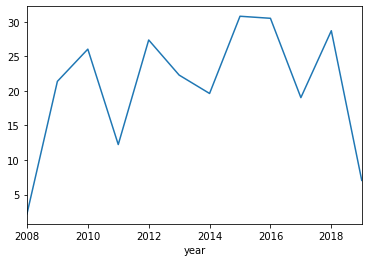

In [18]:
# precipitation by year
weather.groupby("year")["PRCP"].mean().plot()

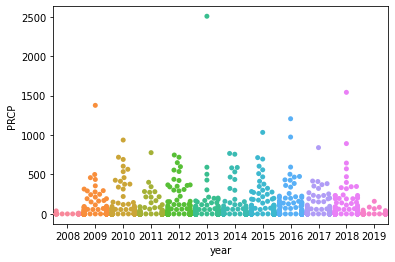

In [19]:
# precicipation by year showing unique outliers
sns.swarmplot(x='year', y="PRCP", data=weather)

In [20]:
# checking WT11 high damaging winds
weather.groupby("year")["WT11"].mean()

year
2008    0.000000
2009    0.010959
2010    0.005479
2011    0.005479
2012    0.005464
2013    0.000000
2014    0.000000
2015    0.000000
2016    0.000000
2017    0.000000
2018    0.000000
2019    0.000000
Name: WT11, dtype: float64

In [21]:
# meeian minnumum weather by month
weather.groupby("month")['TMIN'].median()

month
01     44
02     83
03    122
04    161
05    206
06    239
07    244
08    250
09    222
10    167
11    106
12     61
Name: TMIN, dtype: int64

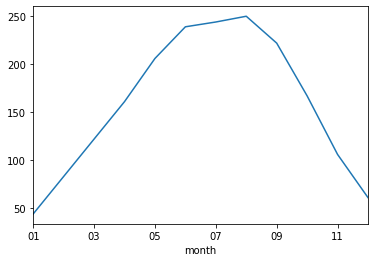

In [22]:
weather.groupby("month")['TMIN'].median().plot()

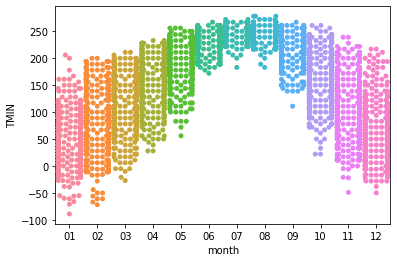

In [23]:
# swarmplot of minnimum temperatures per month
sns.swarmplot(x='month', y='TMIN', data=weather)

In [24]:
sso["SPILL ADDRESS"]

0       3200 THOUSAND OAKS DR
1               6804 S FLORES
2         215 Audrey Alene Dr
3         3602 SE MILITARY DR
4                100 PANSY LN
                ...          
3178        NE LOOP 410 02383
3179         ELDERBERRY 07407
3180        BAYWATER DR 07019
3181         JOHN BARRY 125/1
3182                      NaN
Name: SPILL ADDRESS, Length: 3183, dtype: object

In [25]:
three_11['OBJECTDESC']

0                       ELM CREEK and WURZBACH RD
1         1600  CENTENNIAL BV, San Antonio, 78211
2           310  ROOSEVELT AV, San Antonio, 78210
3           600  NOGALITOS ST, San Antonio, 78204
4          6043  CASTLE QUEEN, San Antonio, 78218
                           ...                   
569032        1509 STEVES AVE, SAN ANTONIO, 78210
569033          2826 IRWIN DR, SAN ANTONIO, 78222
569034           41 EDGECREEK, SAN ANTONIO, 78254
569035     9905 VILLAGE BRIAR, SAN ANTONIO, 78250
569036     9014 SAGEROCK PARK, SAN ANTONIO, 78250
Name: OBJECTDESC, Length: 569037, dtype: object

In [27]:
import re

def convert_street_311(df):
    df[["street_address", 'city', 'zip_code', "something1", "something2"]] = df.OBJECTDESC.str.split(',', expand=True)
    return df

def regex_street(df):
    df['street_name'] = df.street_address.str.replace(r'([\d]+)', '')
    df['street_name'] = df['street_name'].str.lower()
    df['street_name'] = df.street_name.replace(['street', 'st', 'dr', 'drive', 'avenue', 'ave', 'av', 'trail', 'tr','road', 'rd', 'lane', 'ln', 'boulevard', 'blvd', 'bv', 'parkway', 'pkwy'], '', regex=True)
    return df

def do_it():
    df = convert_street_311(three_11)
    df = regex_street(df)
    return df


def format_sso(sso):
    sso['SPILL_ST_NAME'] = sso['SPILL_ST_NAME'].str.lower()
    sso['SPILL_ST_NAME'] = sso['SPILL_ST_NAME'].replace(['street', 'st', 'dr', 'drive', 'avenue', 'ave', 'av', 'trail', 'tr','road', 'rd', 'lane', 'ln', 'boulevard', 'blvd', 'bv', 'parkway', 'pkwy'], '', regex=True)
    return sso


In [28]:
df = do_it()

In [29]:
df.head(1)

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2,street_name
0,Streets & Infrastructure,1010126853,12/10/2011,12/11/2011,3/5/2020,YES,Trans & Cap Improvements,Storm Water,Tree Fallen,Closed,Constituent Call,ELM CREEK and WURZBACH RD,8,2113584.0,13747492.0,6/20/2019,6/20/2020,ELM CREEK and WURZBACH RD,None,None,None,None,elm creek and wurzbach


In [30]:
#df['street_name'] = df.street_name.replace(['street', 'st', 'dr', 'drive', 'avenue', 'ave', 'av', 'trail', 'tr','road', 'rd', 'lane', 'ln', 'boulevard', 'blvd', 'bv'], '', regex=True)

In [31]:
#df.head()

In [32]:
df.street_name

0         elm creek and wurzbach 
1                     centennial 
2                      roosevelt 
3                      nogalitos 
4                      cale queen
                   ...           
569032                      eves 
569033                     irwin 
569034                  edgecreek
569035              village briar
569036              sagerock park
Name: street_name, Length: 569037, dtype: object

In [33]:
df.something1.isna().sum()

562457

In [34]:
df.something2.isna().sum()

569030

In [35]:
df.street_address.isna().sum()

0

In [36]:
sso['SPILL_ST_NAME'].isna().sum()

0

In [37]:
df.street_address.dtype

dtype('O')

In [38]:
sso['SPILL_ST_NAME'].dtype

dtype('O')

In [39]:
df.street_name.values == sso["SPILL_ST_NAME"].values

False

In [40]:
result = sso.join(df)

In [41]:
mask = result.street_name == result['SPILL_ST_NAME']

In [42]:
mask.sum()

0

In [43]:
result

,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2,street_name
0,6582,567722.0,NaN,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,Grease,"Spill ContainedReturned to SystemArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,172A2,3,2019,11,0.0,NaN,8.0,16.550000,PVC,1997.0,NaN,NaN,NaN,NaN,3200 THOUSAND OAKS DR,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,0.450000,2019-03-10 13:43:00,False,24.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,Streets & Infrastructure,1010126853,12/10/2011,12/11/2011,3/5/2020,YES,Trans & Cap Improvements,Storm Water,Tree Fallen,Closed,Constituent Call,ELM CREEK and WURZBACH RD,8,2113584.0,13747492.0,6/20/2019,6/20/2020,ELM CREEK and WURZBACH RD,None,None,None,None,elm creek and wurzbach
1,6583,567723.0,NaN,2019-03-10 00:00:00,6804,S FLORES ST,80,0.0,80.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,251A3,3,2019,11,0.0,NaN,8.0,157.000000,PVC,1988.0,NaN,NaN,NaN,NaN,6804 S FLORES,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,1.083333,2019-03-10 15:30:00,False,120.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,Streets & Infrastructure,1010126880,12/10/2011,12/13/2011,3/5/2020,YES,Trans & Cap Improvements,Streets,Barricade - Misc. Special Event/Emergency,Closed,Constituent Call,"1600 CENTENNIAL BV, San Antonio, 78211",5,2116553.0,13684805.0,6/20/2019,6/20/2020,1600 CENTENNIAL BV,San Antonio,78211,None,None,centennial
2,6581,567714.0,NaN,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,10.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,Structural,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,190E4,3,2019,10,0.0,NaN,8.0,350.000000,CP,1955.0,NaN,NaN,NaN,NaN,215 Audrey Alene Dr,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,1.000000,2019-03-09 19:00:00,False,24.0,NaN,NaN,03/10/2019 09:36,03/10/2019 10:45,1.15,69.0,NaN,NaN,0.0,0.0,Information,1010338011,5/25/2012,NaN,1/27/2020,NO,Knowledge Management,Knowledge,Knowledge Solution Extra,Closed,Constituent Call,"310 ROOSEVELT AV, San Antonio, 78210",5,2132295.0,13693603.0,6/20/2019,6/20/2020,310 ROOSEVELT AV,San Antonio,78210,None,None,roosevelt
3,6584,567713.0,NaN,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,83.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,Grease,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,252C3,3,2019,10,0.0,NaN,8.0,213.910000,PVC,1983.0,NaN,NaN,NaN,NaN,3602 SE MILITARY DR,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,0.550000,2019-03-09 16:10:00,False,120.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,Graffiti,1010444245,8/15/2012,8/30/2012,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,6/20/2019,6/20/2020,600 NOGALITOS ST,San Antonio,78204,None,None,nogalitos
4,6580,567432.0,NaN,2019-03-06 00:00:00,100,PANSY LN,75,0.0,75.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,Structural,"Spill ContainedArea Clean

In [44]:
sso['SPILL_ST_NAME'] = sso['SPILL_ST_NAME'].str.lower()
sso['SPILL_ST_NAME'] = sso['SPILL_ST_NAME'].replace(['street', 'st', 'dr', 'drive', 'avenue', 'ave', 'av', 'trail', 'tr','road', 'rd', 'lane', 'ln', 'boulevard', 'blvd', 'bv', 'parkway', 'pkwy'], '', regex=True)

In [45]:
sso.head()

,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3
0,6582,567722.0,NaN,2019-03-10 00:00:00,3200,thousand oaks,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,Grease,"Spill ContainedReturned to SystemArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,172A2,3,2019,11,0.0,NaN,8.0,16.55,PVC,1997.0,NaN,NaN,NaN,NaN,3200 THOUSAND OAKS DR,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,0.450000,2019-03-10 13:43:00,False,24.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
1,6583,567723.0,NaN,2019-03-10 00:00:00,6804,s flores,80,0.0,80.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,251A3,3,2019,11,0.0,NaN,8.0,157.00,PVC,1988.0,NaN,NaN,NaN,NaN,6804 S FLORES,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,1.083333,2019-03-10 15:30:00,False,120.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
2,6581,567714.0,NaN,2019-03-09 00:00:00,215,auey alene,79,0.0,10.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,Structural,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,190E4,3,2019,10,0.0,NaN,8.0,350.00,CP,1955.0,NaN,NaN,NaN,NaN,215 Audrey Alene Dr,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,1.000000,2019-03-09 19:00:00,False,24.0,NaN,NaN,03/10/2019 09:36,03/10/2019 10:45,1.15,69.0,NaN,NaN,0.0,0.0
3,6584,567713.0,NaN,2019-03-09 00:00:00,3602,se military,83,0.0,83.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,Grease,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,252C3,3,2019,10,0.0,NaN,8.0,213.91,PVC,1983.0,NaN,NaN,NaN,NaN,3602 SE MILITARY DR,NaN,1,1.0,NaN,GRAVITY,Sewer Main,NaN,0.550000,2019-03-09 16:10:00,False,120.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
4,6580,567432.0,NaN,2019-03-06 00:00:00,100,pansy,75,0.0,75.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,Structural,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,192A7,3,2019,10,0.0,NaN,12.0,291.90,CP,1952.0,NaN,NaN,NaN,NaN,100 PANSY LN,NaN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.000000,2019-03-06 09:40:00,False,3.0,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0


In [46]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2,street_name
0,Streets & Infrastructure,1010126853,12/10/2011,12/11/2011,3/5/2020,YES,Trans & Cap Improvements,Storm Water,Tree Fallen,Closed,Constituent Call,ELM CREEK and WURZBACH RD,8,2113584.0,13747492.0,6/20/2019,6/20/2020,ELM CREEK and WURZBACH RD,None,None,None,None,elm creek and wurzbach
1,Streets & Infrastructure,1010126880,12/10/2011,12/13/2011,3/5/2020,YES,Trans & Cap Improvements,Streets,Barricade - Misc. Special Event/Emergency,Closed,Constituent Call,"1600 CENTENNIAL BV, San Antonio, 78211",5,2116553.0,13684805.0,6/20/2019,6/20/2020,1600 CENTENNIAL BV,San Antonio,78211,None,None,centennial
2,Information,1010338011,5/25/2012,NaN,1/27/2020,NO,Knowledge Management,Knowledge,Knowledge Solution Extra,Closed,Constituent Call,"310 ROOSEVELT AV, San Antonio, 78210",5,2132295.0,13693603.0,6/20/2019,6/20/2020,310 ROOSEVELT AV,San Antonio,78210,None,None,roosevelt
3,Graffiti,1010444245,8/15/2012,8/30/2012,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,6/20/2019,6/20/2020,600 NOGALITOS ST,San Antonio,78204,None,None,nogalitos
4,Property Maintenance,1010888252,6/6/2013,8/9/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,6/20/2019,6/20/2020,6043 CASTLE QUEEN,San Antonio,78218,None,None,cale queen


In [47]:
df1 = sso.set_index("SPILL_ST_NAME")
df2 = df.set_index("street_name")

df3 = pd.merge(df1,df2, left_index=True, right_index=True)

In [48]:
df3

,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1015984543,12/19/2019,1/13/2020,12/23/2019,NO,NaN,Urban Forestry,Trees (Tree Assessment),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1015985670,12/20/2019,1/14/2020,12/20/2019,NO,NaN,Urban Forestry,Trees (Broken/Low Hanging Limbs),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016000752,1/6/2020,2/4/2020,1/15/2020,NO,NaN,Traffic Operations,Traffic Signs (Faded/Graffiti),Closed,Constituent Call,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016001585,1/7/2020,1/22/2020,1/8/2020,NO,NaN,Trades,Parks Internal (Irrigation),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016002521,1/7/2020,1/10/2020,1/8/2020,NO,NaN,Trades,Parks I

In [49]:
df3 = df3.reset_index().rename(columns={'index':'street_name'})

In [50]:
df3.head()

,street_name,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
0,amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.0,VCP,1970.0,NaN,NaN,0.0,0.0,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1015984543,12/19/2019,1/13/2020,12/23/2019,NO,NaN,Urban Forestry,Trees (Tree Assessment),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
1,amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.0,VCP,1970.0,NaN,NaN,0.0,0.0,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1015985670,12/20/2019,1/14/2020,12/20/2019,NO,NaN,Urban Forestry,Trees (Broken/Low Hanging Limbs),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
2,amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.0,VCP,1970.0,NaN,NaN,0.0,0.0,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016000752,1/6/2020,2/4/2020,1/15/2020,NO,NaN,Traffic Operations,Traffic Signs (Faded/Graffiti),Closed,Constituent Call,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
3,amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.0,VCP,1970.0,NaN,NaN,0.0,0.0,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016001585,1/7/2020,1/22/2020,1/8/2020,NO,NaN,Trades,Parks Internal (Irrigation),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
4,amiad,2963,187286.0,NaN,2012-12-27 00:00:00,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.0,VCP,1970.0,NaN,NaN,0.0,0.0,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016002521,1/7/2020,1/10/2020,1/8/2020,NO,NaN,Tr

In [51]:
# How many 311 calls were made by street address
df3.groupby('street_name')['Council District'].count()

street_name
amiad              17
brackenridge      215
bulvee              8
cable ranch         1
dafoe              23
evans              10
gold canyon         1
hay oak             2
huebner             5
hunt                5
j                  44
kirk place          1
main plaza          4
medina base        22
mission           126
northampton         1
one oak             8
rigsby              8
rogers              8
san antonio         1
schley              1
somerset            2
tezel               3
thousand oaks       4
tpc                 4
wiseman             2
Name: Council District, dtype: int64

In [52]:
df3.groupby('Council District')['street_name'].count()

Council District
0       1
1       6
2     289
3     127
4      24
5      18
6      16
7       3
8       5
9      25
10     12
Name: street_name, dtype: int64

In [53]:
df3_null = df3.isna().sum() / len(df3) * 100
df3_null.sort_values(ascending=False)

something2            100.0
SPILL_STOP_3          100.0
DWNDPTH               100.0
UPSDPTH               100.0
SPILL_START_3         100.0
                      ...  
ASSETTYPE               0.0
NUM_SPILLS_COMPKEY      0.0
Council District        0.0
Week                    0.0
street_name             0.0
Length: 79, dtype: float64

In [54]:
df3.groupby("CAUSE")['street_name'].count()

CAUSE
Break In By-Pass Line      6
Break In Main             36
Break in Main              1
Contractor                16
Debris                    60
Debris/Rock               23
Grease                    41
I/I                       51
Lift Station               4
Lift Station Pump Out      6
Other - Gate Valve         1
Rags                      26
Structural               255
Name: street_name, dtype: int64

In [55]:
weather.DATE

0      2008-12-03
1      2008-12-04
2      2008-12-05
3      2008-12-06
4      2008-12-07
          ...    
3769   2019-03-30
3770   2019-03-31
3771   2019-04-01
3772   2019-04-02
3773   2019-04-03
Name: DATE, Length: 3774, dtype: datetime64[ns]

In [56]:
df3.REPORTDATE

0      2012-12-27 00:00:00
1      2012-12-27 00:00:00
2      2012-12-27 00:00:00
3      2012-12-27 00:00:00
4      2012-12-27 00:00:00
              ...         
521    2018-12-03 00:00:00
522    2009-03-04 00:00:00
523    2009-03-04 00:00:00
524    2015-08-16 00:00:00
525    2015-08-16 00:00:00
Name: REPORTDATE, Length: 526, dtype: object

In [57]:
df3['REPORTDATE'] = pd.to_datetime(df3['REPORTDATE'])

In [58]:
df3['REPORTDATE'] = df3['REPORTDATE'].dt.date

In [59]:
df3.head(1)

,street_name,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
0,amiad,2963,187286.0,NaN,2012-12-27,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.0,VCP,1970.0,NaN,NaN,0.0,0.0,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1015984543,12/19/2019,1/13/2020,12/23/2019,NO,NaN,Urban Forestry,Trees (Tree Assessment),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None


In [60]:
weather.head(1)

,STATION,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT16,WT17,WT18,year,month,day
0,USW00012921,2008-12-03,42,2302.0,2315.0,0,0,0,0.0,250,89,360,350.0,89,170.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2008,12,03


In [61]:
df4 = weather.set_index("DATE")
df4.head()

,STATION,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT16,WT17,WT18,year,month,day
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-12-03,USW00012921,42,2302.0,2315.0,0,0,0,0.0,250,89,360,350.0,89,170.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2008,12,03
2008-12-04,USW00012921,51,828.0,506.0,0,0,0,0.0,161,39,20,350.0,94,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,12,04
2008-12-05,USW00012921,30,952.0,839.0,0,0,0,0.0,128,22,20,30.0,67,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,12,05
2008-12-06,USW00012921,17,1157.0,1132.0,0,0,0,0.0,206,-11,240,270.0,45,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,12,06
2008-12-07,USW00012921,31,1557.0,1512.0,0,0,0,0.0,217,22,160,190.0,76,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,12,07


In [62]:
df5 = df3.set_index("REPORTDATE")
df5

,street_name,SSO_ID,INSPKEY,SERVNO,SPILL_ADDRESS,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
REPORTDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-27,amiad,2963,187286.0,NaN,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1015984543,12/19/2019,1/13/2020,12/23/2019,NO,NaN,Urban Forestry,Trees (Tree Assessment),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
2012-12-27,amiad,2963,187286.0,NaN,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1015985670,12/20/2019,1/14/2020,12/20/2019,NO,NaN,Urban Forestry,Trees (Broken/Low Hanging Limbs),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
2012-12-27,amiad,2963,187286.0,NaN,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016000752,1/6/2020,2/4/2020,1/15/2020,NO,NaN,Traffic Operations,Traffic Signs (Faded/Graffiti),Closed,Constituent Call,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
2012-12-27,amiad,2963,187286.0,NaN,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016001585,1/7/2020,1/22/2020,1/8/2020,NO,NaN,Trades,Parks Internal (Irrigation),Closed,Web Portal,"Amistad, 1600 TAMPICO ST, SAN ANTONIO, 78207",5,2120165.0,13698630.0,6/20/2019,6/20/2020,Amistad,1600 TAMPICO ST,SAN ANTONIO,78207,None
2012-12-27,amiad,2963,187286.0,NaN,4606,200,200.0,200.0,12/27/2012 11:11:00 AM,12/27/2012 1:15:00 PM,2.066667,Grease,Area cleaned and disinfected,CLEANED MAIN,SALADO CREEK,51027,50730,DRAINAGE CULVERT,None,10.0,552E4,12,2012,52,0.0,GREASE,8.0,306.00,VCP,1970.0,NaN,NaN,0.0,0.00,4606 AMISTAD,NaN,1,NaN,NaN,GRAVITY,Sewer Main,2010-08-29 00:00:00,NaN,NaN,False,NaN,GREASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016002521,1/7/

In [63]:
df6 = pd.merge(df4,df5, left_index=True, right_index=True)

In [64]:
df6.head()

,STATION,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT16,WT17,WT18,year,month,day,street_name,SSO_ID,INSPKEY,SERVNO,SPILL_ADDRESS,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016105493,3/19/2020,7/28/2020,3/19/2020,NO,Development Services,Code Enforcement,Sidewalk Obstructions (Bandit Signs),Closed,311 Mobile App,"Mission Parkway, 3400 MISSION RD, SAN ANTONIO, 78214",3,2135774.0,13677402.0,6/20/2019,6/20/2020,Mission Parkway,3400 MISSION RD,SAN ANTONIO,78214,None
2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016155880,4/19/2020,4/19/2020,4/19/2020,NO,Animal Care Services,Field Operations,Injured-Sick Animal,Closed,Web Portal,"Mission Parkway, 7484 MISSION PKWY, SAN ANTONIO",3,2136976.0,13676434.0,6/20/2019,6/20/2020,Mission Parkway,7484 MISSION PKWY,SAN ANTONIO,None,None
2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016223336,6/1/2020,8/4/2020,6/1/2020,NO,Development Services,Code Enforcement,Property Maintenance (Dead/Fallen Tree),Closed,Web Portal,"Mission Parkway, 3600 MISSION PKWY, SAN ANTONIO, 78214",3,2136440.0,13676752.0,6/20/2019,6/20/2020,Mission Parkway,3600 MISSION PKWY,SAN ANTONIO,78214,None
2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016247323,6/16/2020,7/9/2020,NaN,NO,NaN,Urban Fo

In [65]:
df6 = df6.reset_index().rename(columns={'index':'REPORTDATE'})

In [66]:
df6.head()

,REPORTDATE,STATION,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT16,WT17,WT18,year,month,day,street_name,SSO_ID,INSPKEY,SERVNO,SPILL_ADDRESS,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,FERGUSON,Month,Year,Week,EARZ_ZONE,Expr1029,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,DWNDPTH,UPSDPTH,Inches_No,RainFall_Less3,SPILL ADDRESS,SewerAssetExp,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,TIMEINT,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,street_address,city,zip_code,something1,something2
0,2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016105493,3/19/2020,7/28/2020,3/19/2020,NO,Development Services,Code Enforcement,Sidewalk Obstructions (Bandit Signs),Closed,311 Mobile App,"Mission Parkway, 3400 MISSION RD, SAN ANTONIO, 78214",3,2135774.0,13677402.0,6/20/2019,6/20/2020,Mission Parkway,3400 MISSION RD,SAN ANTONIO,78214,None
1,2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016155880,4/19/2020,4/19/2020,4/19/2020,NO,Animal Care Services,Field Operations,Injured-Sick Animal,Closed,Web Portal,"Mission Parkway, 7484 MISSION PKWY, SAN ANTONIO",3,2136976.0,13676434.0,6/20/2019,6/20/2020,Mission Parkway,7484 MISSION PKWY,SAN ANTONIO,None,None
2,2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016223336,6/1/2020,8/4/2020,6/1/2020,NO,Development Services,Code Enforcement,Property Maintenance (Dead/Fallen Tree),Closed,Web Portal,"Mission Parkway, 3600 MISSION PKWY, SAN ANTONIO, 78214",3,2136440.0,13676752.0,6/20/2019,6/20/2020,Mission Parkway,3600 MISSION PKWY,SAN ANTONIO,78214,None
3,2009-01-14,USW00012921,17,1357.0,1357.0,0,0,0,0.0,189,-22,160,160.0,54,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,01,14,mission,376,NaN,NaN,1515,154000,NaN,154000.0,10/31/2008 10:00:00 AM,1/14/2009 6:00:00 AM,1796.0,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,458339,455033,GROUND,NaN,0.0,NaN,1,2009,3,NaN,STRUCTURAL,54.0,335.0,RCP,1950.0,NaN,NaN,NaN,NaN,MISSION RD 01515,NaN,1,NaN,NaN,SIPHON,Sewer Main,NaN,NaN,NaN,False,NaN,STRUCTURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Category,1016247323,6/16/2020,7/9/2020,

In [ ]:

# acquiring weather, sso and 311 data from acquire.py
weather = acquire.acquire_weather()
sso = acquire.acquire_sso()
three_11 = acquire.acquire_311()
# dropping these columns, 100% null values
weather = weather.drop(columns=['WT19', "WT10", "WT16.1"])
    # filling NaN's with 0's boolean false
weather = weather.fillna(0)
weather[['year', 'month', 'day']] = weather.DATE.str.split('-', expand=True)
    # formating addresses in sso data
sso = format_sso(sso)
    # do_it function formats 311 data for join to sso data
df = do_it()
# dropping sso nulls
#sso['SPILL ADDRESS'] = sso['SPILL_ST_NAME'].dropna() 
    # setting index for merge
df1 = sso.set_index("SPILL_ST_NAME")
df2 = df.set_index("street_name")
df3 = pd.merge(df1,df2, left_index=True, right_index=True)
df3 = df3.reset_index().rename(columns={'index':'street_name'})
    # setting up sso date column as index to merge with weather data
df3['REPORTDATE'] = pd.to_datetime(df3['REPORTDATE'])
df3['REPORTDATE'] = df3['REPORTDATE'].dt.date
df4 = weather.set_index("DATE")
df5 = df3.set_index("REPORTDATE")
df6 = pd.merge(df5,df4, left_index=True, right_index=True)
    # resetting index after merge
df6 = df6.reset_index().rename(columns={'index':'REPORTDATE'})

    
    
    

In [ ]:
df6.head()

In [ ]:
df.head()

In [ ]:
weather.head()

In [ ]:
import prepare

df10 = prepare.wrangle_code()

In [ ]:
df10.head()